<a href="https://colab.research.google.com/github/MSYK28/CompilerConstruction22/blob/main/116843_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 1: Give brief descriptions of the following tools:**

Flex, Bison, Lex, Yacc.

Flex: Fast Lexical analyzer generator is a tool for generating scanners. In stead of writing a scanner from scratch, you only need to identify the vocabulary of a certain language (e.g. Musyoki), write a specification of patterns using regular expressions (e.g. DIGIT [0-9]), and FLEX will construct a scanner for you. Below is an image showing the process. 
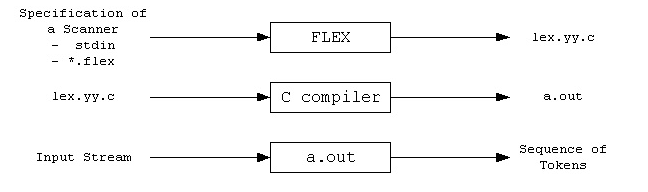

In [ ]:
/* Declaring two counters one for number
of lines other for number of characters */
%{
int no_of_lines = 0;
int no_of_chars = 0;
%}

/***rule 1 counts the number of lines,
rule 2 counts the number of characters
and rule 3 specifies when to stop
taking input***/
%%
\n	 ++no_of_lines;
.	 ++no_of_chars;
end	 return 0;
%%

/*** User code section***/
int yywrap(){}
int main(int argc, char **argv)
{

yylex();
printf("number of lines = %d, number of chars = %d\n",
	no_of_lines, no_of_chars );

return 0;
}


Bison: is a parser generator that is part of the GNU Project. Bison reads a specification in the BNF notation (a context-free language), warns about any parsing ambiguities, and generates a parser that reads sequences of tokens and decides whether the sequence conforms to the syntax specified by the grammar.
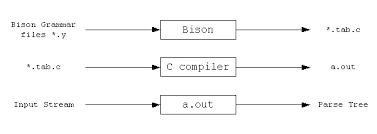

In [ ]:
#include "Expression.h"
#include "Parser.h"
#include "Lexer.h"

#include <stdio.h>

int yyparse(SExpression **expression, yyscan_t scanner);

SExpression *getAST(const char *expr)
{
    SExpression *expression;
    yyscan_t scanner;
    YY_BUFFER_STATE state;

    if (yylex_init(&scanner)) {
        /* could not initialize */
        return NULL;
    }

    state = yy_scan_string(expr, scanner);

    if (yyparse(&expression, scanner)) {
        /* error parsing */
        return NULL;
    }

    yy_delete_buffer(state, scanner);

    yylex_destroy(scanner);

    return expression;
}

int evaluate(SExpression *e)
{
    switch (e->type) {
        case eVALUE:
            return e->value;
        case eMULTIPLY:
            return evaluate(e->left) * evaluate(e->right);
        case eADD:
            return evaluate(e->left) + evaluate(e->right);
        default:
            /* should not be here */
            return 0;
    }
}

int main(void)
{
    char test[] = " 4 + 2*10 + 3*( 5 + 1 )";
    SExpression *e = getAST(test);
    int result = evaluate(e);
    printf("Result of '%s' is %d\n", test, result);
    deleteExpression(e);
    return 0;
}

Lex: is a program that generates lexical analyzer. It is used with YACC parser generator.
The lexical analyzer is a program that transforms an input stream into a sequence of tokens.
It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.
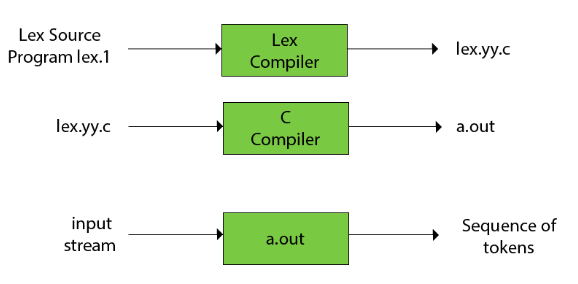

Yacc: yet another compiler-compiler) is an LALR(1) (LookAhead, Left-to-right, Rightmost derivation producer with 1 lookahead token) parser generator. A parser generator is a program that takes as input a specification of a syntax, and produces as output a procedure for recognizing that language. Historically, they are also called compiler-compilers. YACC was originally designed for being complemented by Lex.
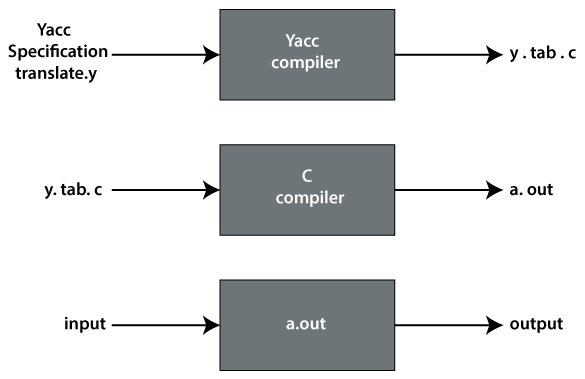

In [ ]:
%{
    #include<stdio.h>
    #include<string.h>
    #include<stdlib.h>
    #include<ctype.h>
    #include"lex.yy.c"
    
    void yyerror(const char *s);
    int yylex();
    int yywrap();
%}

program: headers main '(' ')' '{' body return '}'
;

headers: headers headers
| INCLUDE
;

main: datatype ID
;

datatype: INT 
| FLOAT 
| CHAR
| VOID
;

body: FOR '(' statement ';' condition ';' statement ')' '{' body '}'
| IF '(' condition ')' '{' body '}' else
| statement ';' 
| body body
| PRINTFF '(' STR ')' ';'
| SCANFF '(' STR ',' '&' ID ')' ';'
;

else: ELSE '{' body '}'
|
;

condition: value relop value 
| TRUE 
| FALSE
;

statement: datatype ID init 
| ID '=' expression 
| ID relop expression
| ID UNARY 
| UNARY ID
;

init: '=' value 
|
;

expression: expression arithmetic expression
| value
;

arithmetic: ADD 
| SUBTRACT 
| MULTIPLY
| DIVIDE
;

relop: LT
| GT
| LE
| GE
| EQ
| NE
;

value: NUMBER
| FLOAT_NUM
| CHARACTER
| ID
;

return: RETURN value ';' 
|
;

%%

int main() {
    yyparse();
}

void yyerror(const char* msg) {
    fprintf(stderr, "%s\n", msg);
}